# <font color="red"> <font size="10px"> IMPORTING THE LIBRARIES </font>

In [1]:
# Data manipulation
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Other helpers
import numpy as np
from itertools import permutations

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> CREATING THE DATAFRAME </font>

In [2]:
#####################################################
# Aggregate all of the files into 1 single Dataframe
#####################################################

df = pd.DataFrame()                                                         # Create an empty dataframe to fill via a loop

for i in range(0,10):                                                       # There are 10 json files
        df_path = "Data/url-20210507T100" + str(i) + ".json"                # Create the file path as a string. 

        df_temporary = pd.read_json(df_path,                                # Read the json file
                                    lines=True)

        df = df.append(df_temporary)                                        # Add the json file into the dataframe             

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> GET TO KNOW THE DATASET </font>

In [3]:
df.shape                  # (Rows, Columns)

(35377, 14)

In [4]:
df.head(4)

,permalink,submission,url,response_code,scan_date,scan_id,verbose_msg,last_seen,filescan_id,positives,first_seen,total,additional_info,scans
0,https://www.virustotal.com/gui/url/cff8fb5f592...,"{'submitter_region': None, 'submitter_id': 'c6...",http://120.48.19.10/,1,2021-05-07 08:53:18,cff8fb5f592b653553b607071ee4da4406b2a10bf6b141...,"Scan finished, scan information embedded in th...",2021-05-07 08:53:18,,6,2020-12-06 03:24:24,87,{'resolution': '120.48.19.10'},{'CMC Threat Intelligence': {'detected': False...
1,https://www.virustotal.com/gui/url/4e53aa685b0...,"{'submitter_region': None, 'submitter_id': '84...",http://43.251.159.144/,1,2021-05-07 08:53:18,4e53aa685b0974b94143d93bd9183930041a493178de9c...,"Scan finished, scan information embedded in th...",2021-05-07 08:53:18,,5,2019-07-07 10:25:02,87,{'Response content SHA-256': '7ba518d7137ec9ad...,{'CMC Threat Intelligence': {'detected': False...
2,https://www.virustotal.com/gui/url/2dedd8f2458...,"{'submitter_region': None, 'submitter_id': 'c6...",http://180.167.168.2/,1,2021-05-07 08:53:19,2dedd8f2458c31c87f7581582af05264019b97a3a37de2...,"Scan finished, scan information embedded in th...",2021-05-07 08:53:19,,5,2019-04-14 09:34:07,87,"{'Response code': 200, 'Response headers': {'c...",{'CMC Threat Intelligence': {'detected': False...
3,https://www.virustotal.com/gui/url/2a87f7cc608...,"{'submitter_region': 'be', 'submitter_id': 'b0...",http://clas.sangor.es/,1,2021-05-07 08:58:49,2a87f7cc6083b5b7c0c2ceab8c1bd63c2962773469e4cb...,"Scan finished, scan information embedded in th...",2021-05-07 08:58:49,,0,2019-10-08 12:28:15,88,{'Response content SHA-256': '1338ecab2405f8bc...,{'CMC Threat Intelligence': {'detected': False...


In [5]:
###########################################################
# Observe the unique values within some specific variables
###########################################################

print(   df["response_code"].unique()   )     
print()
print(   df["verbose_msg"].unique()   )
print()
print(   df["total"].unique()   ) 
print()
print(   df["positives"].unique()   ) 

[1]

['Scan finished, scan information embedded in this object']

[87 88 89 90]

[ 6  5  0  7  2  4  1  3  8 11  9 10 17 18 20 12 13 14 15 21 16 19 22 24
 25 23]


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="red"> <font size="10px"> PREPROCESSING </font>

In [6]:
df.head(4)

,permalink,submission,url,response_code,scan_date,scan_id,verbose_msg,last_seen,filescan_id,positives,first_seen,total,additional_info,scans
0,https://www.virustotal.com/gui/url/cff8fb5f592...,"{'submitter_region': None, 'submitter_id': 'c6...",http://120.48.19.10/,1,2021-05-07 08:53:18,cff8fb5f592b653553b607071ee4da4406b2a10bf6b141...,"Scan finished, scan information embedded in th...",2021-05-07 08:53:18,,6,2020-12-06 03:24:24,87,{'resolution': '120.48.19.10'},{'CMC Threat Intelligence': {'detected': False...
1,https://www.virustotal.com/gui/url/4e53aa685b0...,"{'submitter_region': None, 'submitter_id': '84...",http://43.251.159.144/,1,2021-05-07 08:53:18,4e53aa685b0974b94143d93bd9183930041a493178de9c...,"Scan finished, scan information embedded in th...",2021-05-07 08:53:18,,5,2019-07-07 10:25:02,87,{'Response content SHA-256': '7ba518d7137ec9ad...,{'CMC Threat Intelligence': {'detected': False...
2,https://www.virustotal.com/gui/url/2dedd8f2458...,"{'submitter_region': None, 'submitter_id': 'c6...",http://180.167.168.2/,1,2021-05-07 08:53:19,2dedd8f2458c31c87f7581582af05264019b97a3a37de2...,"Scan finished, scan information embedded in th...",2021-05-07 08:53:19,,5,2019-04-14 09:34:07,87,"{'Response code': 200, 'Response headers': {'c...",{'CMC Threat Intelligence': {'detected': False...
3,https://www.virustotal.com/gui/url/2a87f7cc608...,"{'submitter_region': 'be', 'submitter_id': 'b0...",http://clas.sangor.es/,1,2021-05-07 08:58:49,2a87f7cc6083b5b7c0c2ceab8c1bd63c2962773469e4cb...,"Scan finished, scan information embedded in th...",2021-05-07 08:58:49,,0,2019-10-08 12:28:15,88,{'Response content SHA-256': '1338ecab2405f8bc...,{'CMC Threat Intelligence': {'detected': False...


- Due to this error, we will drop the irrevelant varibles, to perform what we want: 
<br>
"Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['scans'], dtype='object'

In [7]:
#################################
# Remove irrevelant variables
#################################

df.drop(["permalink", 
         "submission",
         "response_code",
         "scan_id",
         "verbose_msg",
         "last_seen",
         "filescan_id",
         "first_seen"
         ], 
         axis=1,                          # 1 means "Column-wise operation"
         inplace=True)                    # DataFrame is modified in place
                                       

    
    
df.head(4)                                # See the resulted dataframe

,url,scan_date,positives,total,additional_info,scans
0,http://120.48.19.10/,2021-05-07 08:53:18,6,87,{'resolution': '120.48.19.10'},{'CMC Threat Intelligence': {'detected': False...
1,http://43.251.159.144/,2021-05-07 08:53:18,5,87,{'Response content SHA-256': '7ba518d7137ec9ad...,{'CMC Threat Intelligence': {'detected': False...
2,http://180.167.168.2/,2021-05-07 08:53:19,5,87,"{'Response code': 200, 'Response headers': {'c...",{'CMC Threat Intelligence': {'detected': False...
3,http://clas.sangor.es/,2021-05-07 08:58:49,0,88,{'Response content SHA-256': '1338ecab2405f8bc...,{'CMC Threat Intelligence': {'detected': False...


In [8]:
#########################################
# Creating the "detected engines" column
#########################################

b=[]

for i in range(0, len(df)):                                    # Iterate over each of the rows
         
            a = pd.DataFrame.from_dict(df.iloc[i, 5],          # 5 --> "scans" column
                                       orient='index')

            a = a.loc[a['detected'] == True]                   # Get only detected rows

            a = list(a.index)                                  # Get row names and turn into a "list"

            b.append(a)                                        # Resulted "list" will be added into "b" list

In [9]:
####################################
# Add this data into "df" dataframe
####################################

detected_engines = pd.DataFrame({'detected engines': b})       # Turn "b" list into a dataframe with "detected engines" colname

df["detected engines"] = detected_engines                      # Create a "detected engines" column in "df" dataframe

In [10]:
######################
# Missing value check
######################

df.isnull().sum()              # No missing value within the dataframe

url                 0
scan_date           0
positives           0
total               0
additional_info     0
scans               0
detected engines    0
dtype: int64

In [11]:
##########################################################
# Discover the URL patterns, by looking at various values
###########################################################

list(df.iloc[80:100, 0])

['http://hykoqwndgtd.tlww.net/',
 'https://media.tradingtwins.eu/monitoring/anbieter-nopadding.png',
 'https://allmartialartist.blogspot.com/',
 'http://103.235.170.195/',
 'http://121.201.95.66/',
 'https://kyo2blue.blog.ss-blog.jp/2007-12-18',
 'https://www.digibooks.app/ingreso',
 'http://116.110.111.248/',
 'http://185.245.96.252/',
 'http://213.176.60.74/',
 'http://pooyeshenviro.ir/',
 'https://mymsitblog.wordpress.com/2016/08/21/the-advantages-and-disadvantages-of-virtual-communities-established-through-social-networking-sites/',
 'http://91.203.5.146/',
 'http://47.104.153.31:7088/ETHMF.exe',
 'http://macoser.biz/',
 'http://61.141.235.103/',
 'https://zobetohim.files.wordpress.com/2014/09/industrial-organization-theory-and-practice.pdf',
 'https://mcroth.wordpress.com/2010/11/01/full-mv-ayyy-girl-by-jyj/',
 'https://raymondcc.r.worldssl.net/Free_Space_Wiper_Frontend.exe',
 'http://103.28.52.93/']

In [12]:
#########################
# "FQDN" column creation
#########################
df["FQDN"] = df["url"].str.replace("http://", "")               # Remove the Protocol and create an "FQDN" column in "df"
df["FQDN"] = df["FQDN"].str.replace("https://", "")             # Remove the other type of protocol 
df["FQDN"] = df["FQDN"].str.split("/").str[0]    +    "."       # Split by "/" and obtain the first part


list(df.iloc[80:100, 7])                                        # To compare the result with the output of previous cell

['hykoqwndgtd.tlww.net.',
 'media.tradingtwins.eu.',
 'allmartialartist.blogspot.com.',
 '103.235.170.195.',
 '121.201.95.66.',
 'kyo2blue.blog.ss-blog.jp.',
 'www.digibooks.app.',
 '116.110.111.248.',
 '185.245.96.252.',
 '213.176.60.74.',
 'pooyeshenviro.ir.',
 'mymsitblog.wordpress.com.',
 '91.203.5.146.',
 '47.104.153.31:7088.',
 'macoser.biz.',
 '61.141.235.103.',
 'zobetohim.files.wordpress.com.',
 'mcroth.wordpress.com.',
 'raymondcc.r.worldssl.net.',
 '103.28.52.93.']

In [13]:
##########################
# Export the first 10 rows
##########################
firstten = df.iloc[0:10, :]

firstten.to_excel("firstten.xlsx")   # Then, manually edit the Excel file, to have a good look

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="#3DD8F1"> <font size="10px"> TOP 10 ENGINES </font>

In [14]:
########################
# Prepare the dataframe
########################

df_topten = df.loc[:, ["detected engines","FQDN"]]               # Crate a dataframe with these specific columns

df_topten = df_topten.explode("detected engines")                # Distribute the elements of this "list" object

df_topten.drop_duplicates(keep="first",                          # To have only unique engine-FQDN combinations
                          inplace=True)                          



df_topten.head(4)

,detected engines,FQDN
0,Comodo Valkyrie Verdict,120.48.19.10.
0,CRDF,120.48.19.10.
0,CyRadar,120.48.19.10.
0,EmergingThreats,120.48.19.10.


In [15]:
##############################################
# Counting the engines and viewing the top 10
##############################################

df_topten = df_topten["detected engines"].value_counts()        # Count each unique value within the "detected engines" column

df_topten = df_topten.iloc[0:10]                                # Take the top 10

df_topten = df_topten.to_frame()                                # Pandas Series ---> Pandas Dataframe

df_topten.columns = ["Detected FQDNs"]                          # Assign this, as a column name

df_topten.sort_values(by=["Detected FQDNs"],                    # To be able to have a plot (below) with descending order
                      ascending=True,
                      inplace=True)



df_topten

,Detected FQDNs
alphaMountain.ai,1537
Kaspersky,1878
Webroot,3063
Fortinet,3295
EmergingThreats,3567
IPsum,5124
Comodo Valkyrie Verdict,5165
CyRadar,5272
GreenSnow,5432
CRDF,5610


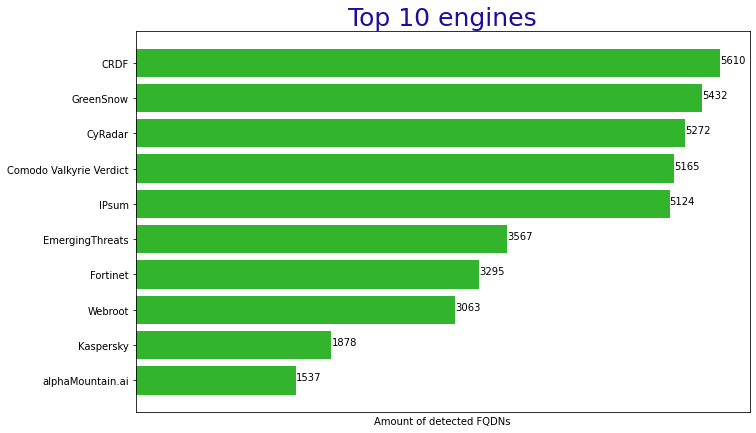

In [16]:
####################################
# Visualization: Horizontal Bar Plot
####################################

# Size adjustment
plt.figure(figsize=(11, 7))


# Main plot
plt.barh(df_topten.index,
         df_topten["Detected FQDNs"],
         color="#32B42C")
 

# x-axis label
plt.xlabel("Amount of detected FQDNs")


# Title
plt.title("Top 10 engines",
          size=25,
          color="#1C0D9F")


# Adding the numbers into the plot, as a text
for index, value in enumerate(df_topten["Detected FQDNs"]):
            plt.text(value, index,                             # (x, y) coordinate
                     str(value))                               # Text

        
# Adjusting xticks
plt.xticks([])                                     # Do not display yticks; it will not bring any value with a plot like this


# Display the plot
plt.show()

<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="#3DD8F1"> <font size="10px"> ENGINE SIMILARITIES </font>

In [17]:
##########################################################################
# Create a "list" object with the top 10 engines, to iterate via for loop
##########################################################################

topten = list(df_topten.index)


topten

['alphaMountain.ai',
 'Kaspersky',
 'Webroot',
 'Fortinet',
 'EmergingThreats',
 'IPsum',
 'Comodo Valkyrie Verdict',
 'CyRadar',
 'GreenSnow',
 'CRDF']

In [18]:
########################
# Prepare the dataframe
########################

df_similarities = df.loc[:, ["detected engines","FQDN"]]               # Get the required columns

df_similarities = df_similarities.explode("detected engines")          # Distribute the elements of the list

df_similarities.drop_duplicates(keep="first",                          # To have only unique engine-FQDN combinations
                                inplace=True)                          




df_similarities.head(8)

,detected engines,FQDN
0,Comodo Valkyrie Verdict,120.48.19.10.
0,CRDF,120.48.19.10.
0,CyRadar,120.48.19.10.
0,EmergingThreats,120.48.19.10.
0,IPsum,120.48.19.10.
0,GreenSnow,120.48.19.10.
1,Comodo Valkyrie Verdict,43.251.159.144.
1,Webroot,43.251.159.144.


In [19]:
####################################################
# Gather the FQDNs of the engines, into a dictionary
####################################################

d = dict()

for engine in topten:
            df_temp = df_similarities[df_similarities["detected engines"] == engine]
            df_temp = df_temp["FQDN"]            # Get only the FQDNs
            d[engine] = df_temp                  # Add the Engine & its FQDN values, into the dictionary "d" 

        
        
        
d.keys()                                         # Check the "keys" of the dictionary

dict_keys(['alphaMountain.ai', 'Kaspersky', 'Webroot', 'Fortinet', 'EmergingThreats', 'IPsum', 'Comodo Valkyrie Verdict', 'CyRadar', 'GreenSnow', 'CRDF'])

In [20]:
###############################################################
# Create engine combinations such as ('Kaspersky', 'Fortinet')
###############################################################

possible_permutations = list(permutations(topten, 2))            # To have a more beautiful heatmap, did not use "combinations"               


possible_permutations

[('alphaMountain.ai', 'Kaspersky'),
 ('alphaMountain.ai', 'Webroot'),
 ('alphaMountain.ai', 'Fortinet'),
 ('alphaMountain.ai', 'EmergingThreats'),
 ('alphaMountain.ai', 'IPsum'),
 ('alphaMountain.ai', 'Comodo Valkyrie Verdict'),
 ('alphaMountain.ai', 'CyRadar'),
 ('alphaMountain.ai', 'GreenSnow'),
 ('alphaMountain.ai', 'CRDF'),
 ('Kaspersky', 'alphaMountain.ai'),
 ('Kaspersky', 'Webroot'),
 ('Kaspersky', 'Fortinet'),
 ('Kaspersky', 'EmergingThreats'),
 ('Kaspersky', 'IPsum'),
 ('Kaspersky', 'Comodo Valkyrie Verdict'),
 ('Kaspersky', 'CyRadar'),
 ('Kaspersky', 'GreenSnow'),
 ('Kaspersky', 'CRDF'),
 ('Webroot', 'alphaMountain.ai'),
 ('Webroot', 'Kaspersky'),
 ('Webroot', 'Fortinet'),
 ('Webroot', 'EmergingThreats'),
 ('Webroot', 'IPsum'),
 ('Webroot', 'Comodo Valkyrie Verdict'),
 ('Webroot', 'CyRadar'),
 ('Webroot', 'GreenSnow'),
 ('Webroot', 'CRDF'),
 ('Fortinet', 'alphaMountain.ai'),
 ('Fortinet', 'Kaspersky'),
 ('Fortinet', 'Webroot'),
 ('Fortinet', 'EmergingThreats'),
 ('Fortinet', '

In [21]:
#######################################################
# Calculate Jaccard scores for each engine combination
#######################################################

jaccard_list = []

for (first_engine, second_engine) in possible_permutations:                           
            first_values = d.get(first_engine)        # Find the "First engine" in the dictionary as a key, return its value (Its FQDNs)
            second_values = d.get(second_engine)      # Find the "Second engine" in the dictionary as a key, return its value (Its FQDNs)

            intersection = len(   set(first_values) & set(second_values)   )      # A n B
            union =        len(   set(first_values) | set(second_values)   )      # A u B

            jaccard_score = intersection / union

            jaccard_list.append([first_engine, second_engine, jaccard_score])     # Add a "list" object as an element into our "list" object

In [22]:
####################
# Edits to beautify
####################

jaccard_list = pd.DataFrame(jaccard_list,                                                   # List ---> Dataframe
                            columns=["First engine", "Second engine", "Jaccard score"])

jaccard_list["Jaccard score"] = jaccard_list["Jaccard score"].round(2)                      # Round to 2 decimal places

jaccard_list.sort_values(by="Jaccard score",                                                # Sort by Jaccard scores
                         ascending=False,
                         inplace=True)




jaccard_list.head(5)

,First engine,Second engine,Jaccard score
77,GreenSnow,IPsum,0.76
52,IPsum,GreenSnow,0.76
40,EmergingThreats,IPsum,0.67
49,IPsum,EmergingThreats,0.67
88,CRDF,CyRadar,0.61


In [23]:
#########################################################
# To be able to create a "Heatmap", create a pivot table
#########################################################

df_pivot = jaccard_list.pivot(index = "First engine",            # Will be ordered up-down direction
                              columns = "Second engine",         # Will be ordered left-right direction
                              values = "Jaccard score"           # Will be filled into the cells
                              )

Text(123.0, 0.5, ' ')

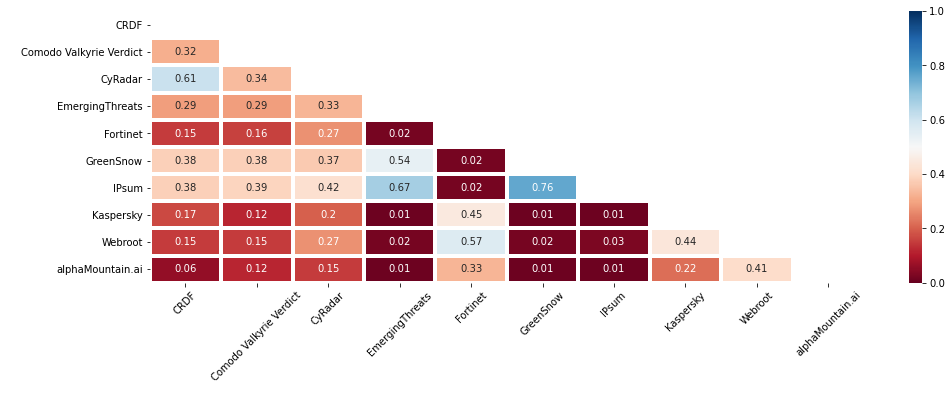

In [24]:
#########################
# Visualization: Heatmap
#########################

plt.figure(figsize=(16, 5))                            # Plot size

mask = np.triu(np.ones_like(df_pivot))                 # Creating mask to have a triangular plot

heatmap = sns.heatmap(df_pivot,                        # Create the heatmap
                      mask=mask,
                      cmap="RdBu",                     # Colormap will be created with "Red" and "Blue"
                      vmin=0,                          # Min value within the Colormap
                      vmax=1,                          # Max value within the Colormap
                      annot=True,                      # Show the "numbers"
                      linewidths=3)                    # To adjust the separating white lines

heatmap.set_xticklabels(heatmap.get_xticklabels(),     # Rotate the xticklabels to ensure readability
                        rotation=45                    # Angle
                        )

heatmap.set_xlabel(" ")                                # Remove the label of x-axis
heatmap.set_ylabel(" ")                                # Remove the label of y-axis

<u> Problems of rounding to 1 decimal place: </u>
- 0.44 will be 0.4; 0.45 will be 0.5. Even though they are almost the same, they will look different. Therefore, it will be misleading
- Example: Fortinet-EmergingThreats. If 2 decimal places, it is 0.02. However, if 1 decimal place, it is 0; therefore, since 0 means "there is no similarity", it will be misleading 


<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>
<br>

# <font color="#3DD8F1"> <font size="10px"> WHY OF A FEW FQDNs </font>

In [25]:
df_twofqdns = df.sort_values(by=["positives"],                  # Get the top detected URLs
                             ascending=False
                             )

df_twofqdns = df_twofqdns[df_twofqdns["positives"] != 0]        # Get rows that only have 0> positives value

df_twofqdns = df_twofqdns[["positives", "FQDN"]]                # Get only the selected columns




df_twofqdns.head(30)

,positives,FQDN
4212,25,paypial-us.com.
4065,24,docsharex-authorize.firebaseapp.com.
3564,24,docsharex-authorize.firebaseapp.com.
4304,23,confirm-mypayees-support.com.
3719,22,joingrupwhatsapp6.duckdns.org.
3796,22,107.172.43.154.
3661,22,certicobanque.cf.
3910,22,grubtantenadiah.crotteros.cf.
3560,22,onlinehalifax-account.com.
3783,22,tokendigital.1bn-zonaseguraperu.com.


In [26]:
df_twofqdns.loc[[3719, 3724], :]            # Show the selected 2 rows

,positives,FQDN
3719,22,joingrupwhatsapp6.duckdns.org.
3724,20,www.amazon.co-jp.aabuqnduqun.top.


- These 2 FQDNs are marked as <b>malicious</b>. Both of them contain the names of the popular companies: <b>whatsapp, amazon</b>. However, they are not one of the <b>official FQDNs</b>. Therefore, their intention is <b>phishing</b>. VirusTotal engines probably use a dataset which includes <b>whitelist domains</b> and since those 2 do not exist in the dataset, they are marked as malicious